# **TIME-SERIES**

- Contains: Trend + seasonality + auto-correlation + noise

In [1]:
# Initialize

import numpy as np
import tensorflow as tf

from matplotlib import pyplot as plt
from tensorflow import keras

# set random seeds
np.random.seed(0)
tf.random.set_seed(0)

# show figures inline
%matplotlib inline

Credits: Follwoing codes are from [Laurence Moroney](https://github.com/lmoroney/dlaicourse).

In [2]:
def plot_series(time, series, format="-", start=0, end=None, label=None):
    plt.plot(time[start:end], series[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("Value")
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)

## Trend
Let's create a time series that just trends upward:

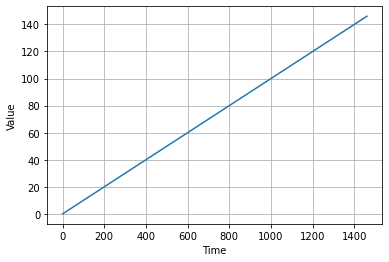

In [3]:
def trend(time, slope=0):
    return slope * time

time = np.arange(4 * 365 + 1)
baseline = 10
series = trend(time, 0.1)

plot_series(time, series)
plt.show()

## Seasonality
Now let's generate a time series with a seasonal pattern:

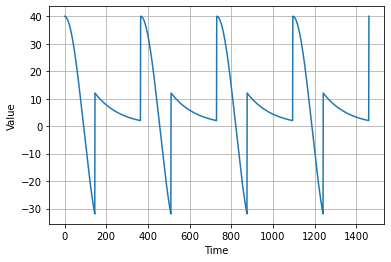

In [4]:
def seasonal_pattern(season_time):
    """Just an arbitrary pattern, you can change it if you wish"""
    return np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

baseline = 10
amplitude = 40
series = seasonality(time, period=365, amplitude=amplitude)

plot_series(time, series)
plt.show()

### Trend + Seasonality
Now let's create a time series with both trend and seasonality:

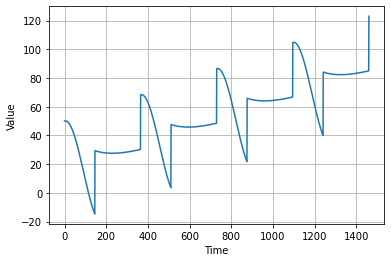

In [5]:
slope = 0.05
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)

plot_series(time, series)
plt.show()

## Noise
In practice few real-life time series have such a smooth signal.
They usually have some noise, and the signal-to-noise ratio can sometimes be very low.

Let's generate some white noise:

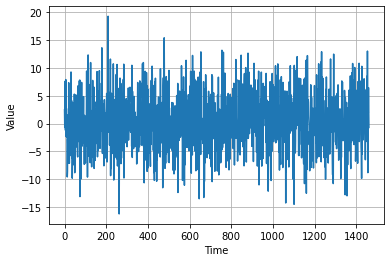

In [6]:
def white_noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

noise_level = 5
noise = white_noise(time, noise_level, seed=42)

plot_series(time, noise)
plt.show()

### Trend + Seasonality + Noise
Now let's add this white noise to the time series:

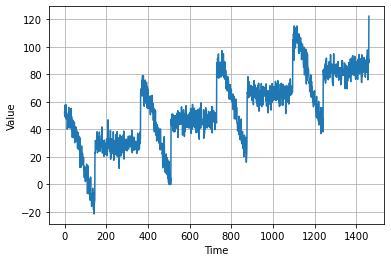

In [7]:
series += noise

plot_series(time, series)
plt.show()

## Auto-correlation

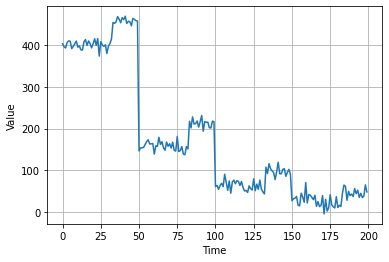

In [8]:
def autocorrelation(time, amplitude, seed=None):
    rnd = np.random.RandomState(seed)
    φ1 = 0.5
    φ2 = -0.1
    ar = rnd.randn(len(time) + 50)
    ar[:50] = 100
    for step in range(50, len(time) + 50):
        ar[step] += φ1 * ar[step - 50]
        ar[step] += φ2 * ar[step - 33]
    return ar[50:] * amplitude

series = autocorrelation(time, 10, seed=42)
plot_series(time[:200], series[:200])
plt.show()

### Auto-correlation + Trend

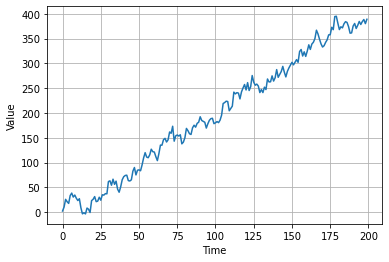

In [9]:
def autocorrelation(time, amplitude, seed=None):
    rnd = np.random.RandomState(seed)
    φ = 0.8
    ar = rnd.randn(len(time) + 1)
    for step in range(1, len(time) + 1):
        ar[step] += φ * ar[step - 1]
    return ar[1:] * amplitude

series = autocorrelation(time, 10, seed=42) + trend(time, 2)
plot_series(time[:200], series[:200])
plt.show()

### Auto-correlation + Trend + Seasonality


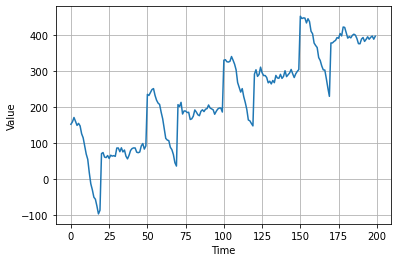

In [10]:
series = autocorrelation(time, 10, seed=42) + seasonality(time, period=50, amplitude=150) + trend(time, 2)
plot_series(time[:200], series[:200])
plt.show()

## Non-stationary Time-series

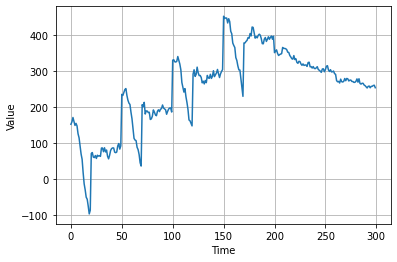

In [11]:
series = autocorrelation(time, 10, seed=42) + seasonality(time, period=50, amplitude=150) + trend(time, 2)
series2 = autocorrelation(time, 5, seed=42) + seasonality(time, period=50, amplitude=2) + trend(time, -1) + 550
series[200:] = series2[200:]
#series += noise(time, 30)
plot_series(time[:300], series[:300])
plt.show()

## Impulses
- Sudden peaks in the data.

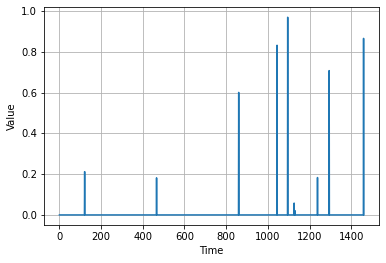

In [12]:
def impulses(time, num_impulses, amplitude=1, seed=None):
    rnd = np.random.RandomState(seed)
    impulse_indices = rnd.randint(len(time), size=10)
    series = np.zeros(len(time))
    for index in impulse_indices:
        series[index] += rnd.rand() * amplitude
    return series

series = impulses(time, 10, seed=42)
plot_series(time, series)
plt.show()

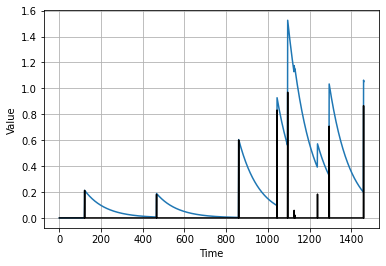

In [13]:
def autocorrelation(source, φs):
    ar = source.copy()
    max_lag = len(φs)
    for step, value in enumerate(source):
        for lag, φ in φs.items():
            if step - lag > 0:
              ar[step] += φ * ar[step - lag]
    return ar

signal = impulses(time, 10, seed=42)
series = autocorrelation(signal, {1: 0.99})
plot_series(time, series)
plt.plot(time, signal, "k-")
plt.show()

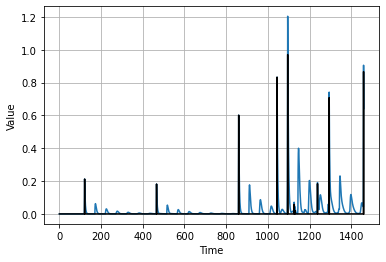

In [14]:
signal = impulses(time, 10, seed=42)
series = autocorrelation(signal, {1: 0.70, 50: 0.2})
plot_series(time, series)
plt.plot(time, signal, "k-")
plt.show()